In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('../data/Mumbai_House_Price.csv')
print(df.head())

   bhk       type                              locality  area  price  \
0    3  Apartment   Lak And Hanware The Residency Tower   685   2.50   
1    2  Apartment     Radheya Sai Enclave Building No 2   640  52.51   
2    2  Apartment                         Romell Serene   610   1.73   
3    2  Apartment  Soundlines Codename Urban Rainforest   876  59.98   
4    2  Apartment                         Origin Oriana   659  94.11   

  price_unit          region              status  age  
0         Cr    Andheri West       Ready to move  New  
1          L    Naigaon East  Under Construction  New  
2         Cr   Borivali West  Under Construction  New  
3          L          Panvel  Under Construction  New  
4          L  Mira Road East  Under Construction  New  


In [8]:
# price_corr = df.corr()['price_in_USD'].sort_values(ascending=False)
# print(price_corr)

In [9]:
X = df.drop(columns='price')
Y = df['price']

In [10]:
# One-hot encode categorical variables
categorical_features = ['type', 'locality', 'price_unit', 'region', 'status', 'age']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [11]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

model = NeuralNetwork()


In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [14]:
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, Y_val_tensor).item()
        val_losses.append(val_loss)

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')


Epoch [1/10], Loss: 451.8112
Epoch [2/10], Loss: 240.7672
Epoch [3/10], Loss: 200.3360
Epoch [4/10], Loss: 174.4907
Epoch [5/10], Loss: 155.7525
Epoch [6/10], Loss: 139.2503
Epoch [7/10], Loss: 126.0953
Epoch [8/10], Loss: 112.8778
Epoch [9/10], Loss: 102.0865
Epoch [10/10], Loss: 93.6684


In [23]:
from sklearn.metrics import r2_score
# Evaluate the model on the training set
model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor)
    train_loss = criterion(train_predictions, Y_train_tensor).item()
    print(f'Mean Squared Error on training set: {train_loss:.4f}')
    # Convert predictions and targets back to numpy arrays
    predictions_np = predictions.numpy()
    Y_test_np = Y_test_tensor.numpy()
    
    # Calculate R-squared
    r2 = r2_score(Y_test_np, predictions_np)
    print(f'R-squared on test set: {r2:.4f}')

# Plot predictions vs actual
plt.scatter(Y_test_np, predictions_np, color='green', label='Predicted', s=20)
plt.scatter(Y_test_np, Y_test_np, color='red', label='Actual', s=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



Mean Squared Error on training set: 85.1070


Mean Squared Error on test set: 122.5252
R-squared on test set: 0.8873


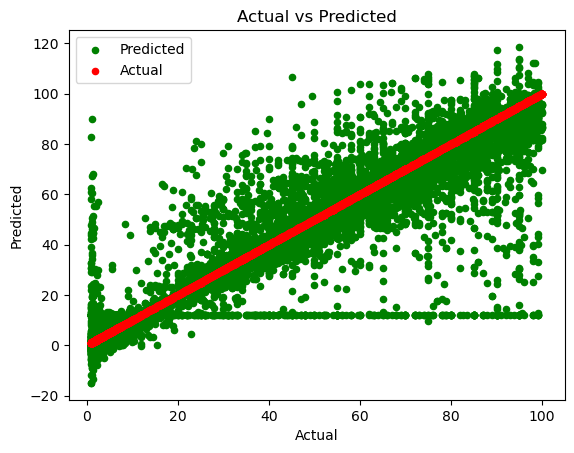

In [22]:
from sklearn.metrics import r2_score
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, Y_test_tensor).item()
    print(f'Mean Squared Error on test set: {test_loss:.4f}')
    
    # Convert predictions and targets back to numpy arrays
    predictions_np = predictions.numpy()
    Y_test_np = Y_test_tensor.numpy()
    
    # Calculate R-squared
    r2 = r2_score(Y_test_np, predictions_np)
    print(f'R-squared on test set: {r2:.4f}')

# Plot predictions vs actual
plt.scatter(Y_test_np, predictions_np, color='green', label='Predicted', s=20)
plt.scatter(Y_test_np, Y_test_np, color='red', label='Actual', s=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



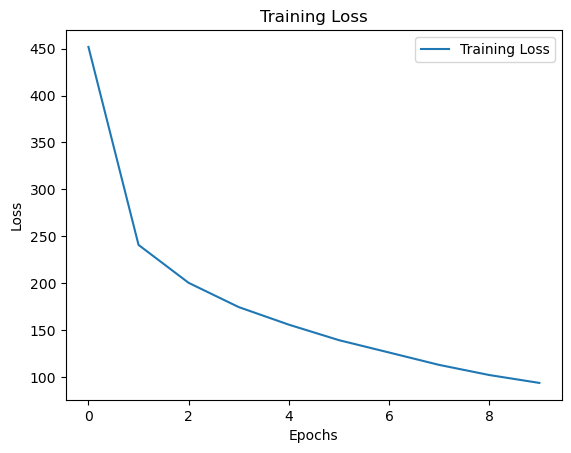

In [16]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
